In [ ]:
pip install tensorflow

In [ ]:
pip install transformers

## **Model 1: Taking one text file as an input**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

import tensorflow as tf
import pandas as pd
import numpy as np

# reading the data from local google drive
with open('/content/drive/MyDrive/sherlock/houn.txt') as story:
  story_data = story.read()

#print(story_data)

In [ ]:

# data cleaning process
import re                                # Regular expressions to use sub function for replacing the useless text from the data

def clean_text(text):
  text = re.sub(r',', '', text)
  text = re.sub(r'\'', '',  text)
  text = re.sub(r'\"', '', text)
  text = re.sub(r'\(', '', text)
  text = re.sub(r'\)', '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub(r'“', '', text)
  text = re.sub(r'”', '', text)
  text = re.sub(r'’', '', text)
  text = re.sub(r'\.', '', text)
  text = re.sub(r';', '', text)
  text = re.sub(r':', '', text)
  text = re.sub(r'\-', '', text)

  return text

# cleaning the data
lower_data = story_data.lower()           # Converting the string to lower case to get uniformity

split_data = lower_data.splitlines()      # Splitting the data to get every line seperately but this will give the list of uncleaned data

#print(split_data)

final = ''                                # initiating a argument with blank string to hold the values of final cleaned data

for line in split_data:
  line = clean_text(line)
  final += '\n' + line

print(final)

final_data = final.split('\n')       # splitting again to get list of cleaned and splitted data ready to be processed
#print(final_data)






                          the hound of the baskervilles

                               arthur conan doyle







                                table of contents
        mr sherlock holmes
        the curse of the baskervilles
        the problem
        sir henry baskerville
        three broken threads
        baskerville hall
        the stapletons of merripit house
        first report of dr watson
        second report of dr watson
        extract from the diary of dr watson
        the man on the tor
        death on the moor
        fixing the nets
        the hound of the baskervilles
        a retrospection















          chapter i
          mr sherlock holmes


     mr sherlock holmes who was usually very late in the mornings save
     upon those not infrequent occasions when he was up all night was
     seated at the breakfast table i stood upon the hearthrug and picked
     up the stick which our visitor had left behind him the night before
     it was a fi

In [ ]:
final_data[:5]

['', '', '', '', '']

### **Creating n-gram sequences from the sentences**

* Consider this sentence : ['Sherlock Holmes and Dr. Watson']. Here we will use ['Sherlock Holmes and Dr.'] to predict ['Watson']. This is the basic concept of forecasting which can be applied here to generate text.

* An advacement of this will be to use single word or every combination words possible from the sentence to predict the next word. And this is loosely termed as n_gram sequences

* Say, The sentence ['Sherlock Holmes and Dr. Watson'] will have sequence as [112, 113, 114, 7, 5, ]

* so we will use combinations of words to make our model better

* [112, 113],
* [112, 113, 114],
* [112, 113, 114, 7],
* [112, 113, 114, 7, 5],

* we train our model that if 112 comes then it has to predict 113.
* if combination of 112, 113, comes then it has to predict 114 and so on.


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Instantiating the Tokenizer
max_vocab = 1000000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(final_data)

# Getting the total number of words of the data.
word2idx = tokenizer.word_index
print(len(word2idx))
print(word2idx)
vocab_size = len(word2idx) + 1        # Adding 1 to the vocab_size because the index starts from 1 not 0. This will make it uniform when using it further
print(vocab_size)



# We will turn the sentences to sequences line by line and create n_gram sequences

input_seq = []

for line in final_data:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_seq = token_list[:i+1]
    input_seq.append(n_gram_seq)

print(input_seq)

# Getting the maximum length of sequence for padding purpose
max_seq_length = max(len(x) for x in input_seq)
print(max_seq_length)

# Padding the sequences and converting them to array
input_seq = np.array(pad_sequences(input_seq, maxlen=max_seq_length, padding='pre'))
print(input_seq)

# Taking xs and labels to train the model.

xs = input_seq[:, :-1]        # xs contains every word in sentence except the last one because we are using this value to predict the y value
labels = input_seq[:, -1]     # labels contains only the last word of the sentence which will help in hot encoding the y value in next step
print("xs: ",xs)
print("labels:",labels)

5834
{'the': 1, 'and': 2, 'of': 3, 'i': 4, 'to': 5, 'a': 6, 'that': 7, 'it': 8, 'he': 9, 'in': 10, 'you': 11, 'was': 12, 'his': 13, 'is': 14, 'have': 15, 'had': 16, 'my': 17, 'we': 18, 'with': 19, 'for': 20, 'which': 21, 'as': 22, 'but': 23, 'not': 24, 'at': 25, 'sir': 26, 'this': 27, 'be': 28, 'me': 29, 'him': 30, 'upon': 31, 'there': 32, 'from': 33, 'no': 34, 'said': 35, 'so': 36, 'one': 37, 'on': 38, 'been': 39, 'all': 40, 'by': 41, 'were': 42, 'if': 43, 'our': 44, 'what': 45, 'an': 46, 'man': 47, 'could': 48, 'are': 49, 'would': 50, 'very': 51, 'holmes': 52, 'us': 53, 'your': 54, 'will': 55, 'do': 56, 'has': 57, 'out': 58, 'her': 59, 'moor': 60, 'then': 61, 'who': 62, 'henry': 63, 'when': 64, 'should': 65, 'some': 66, 'more': 67, 'she': 68, 'or': 69, 'up': 70, 'know': 71, 'now': 72, 'over': 73, 'see': 74, 'watson': 75, 'baskerville': 76, 'well': 77, 'did': 78, 'down': 79, 'into': 80, 'dr': 81, 'about': 82, 'they': 83, 'may': 84, 'can': 85, 'them': 86, 'any': 87, 'how': 88, 'only': 

In [ ]:
from keras.utils import to_categorical

# one-hot encoding the labels according to the vocab size

# The matrix is square matrix of the size of vocab_size. Each row will denote a label and it will have
# a single +ve value(i.e 1) for that label and other values will be zero.

ys = to_categorical(labels, num_classes=vocab_size)
print(ys)

from keras.layers import Input, Dense, Embedding, LSTM, Dropout, Bidirectional, GlobalMaxPooling1D
from keras.models import Model
from keras.optimizers import Adam
from keras.models import Sequential

# using the functional APIs of keras to define the model

i = Input(shape=(max_seq_length - 1, ))                           # using 1 less value becasuse we are preserving the last value for predicted word
x = Embedding(vocab_size, 124)(i)
x = Dropout(0.2)(x)
x = LSTM(520, return_sequences=True)(x)
x = Bidirectional(layer=LSTM(340, return_sequences=True))(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(vocab_size, activation='softmax')(x)

model = Model(i,x)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
model.compile(optimizer=Adam(lr=0.001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])


r=model.fit(xs,ys,epochs=50)

Epoch 1/50
1681/1681 [==============================] - 42s 21ms/step - loss: 1.9726 - accuracy: 0.5284
Epoch 2/50
1681/1681 [==============================] - 29s 17ms/step - loss: 1.8579 - accuracy: 0.5528
Epoch 3/50
1681/1681 [==============================] - 30s 18ms/step - loss: 1.7966 - accuracy: 0.5651
Epoch 4/50
1681/1681 [==============================] - 29s 17ms/step - loss: 1.7398 - accuracy: 0.5777
Epoch 5/50
1681/1681 [==============================] - 29s 17ms/step - loss: 1.6863 - accuracy: 0.5883
Epoch 6/50
1681/1681 [==============================] - 29s 17ms/step - loss: 1.6349 - accuracy: 0.6005
Epoch 7/50
1681/1681 [==============================] - 28s 17ms/step - loss: 1.5691 - accuracy: 0.6107
Epoch 8/50
1681/1681 [==============================] - 28s 17ms/step - loss: 1.5167 - accuracy: 0.6261
Epoch 9/50
1681/1681 [==============================] - 28s 17ms/step - loss: 1.4672 - accuracy: 0.6356
Epoch 10/50
1681/1681 [==============================] - 29s 17m

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16)]              0         
                                                                 
 embedding (Embedding)       (None, 16, 124)           723540    
                                                                 
 dropout (Dropout)           (None, 16, 124)           0         
                                                                 
 lstm (LSTM)                 (None, 16, 520)           1341600   
                                                                 
 bidirectional (Bidirection  (None, 16, 680)           2341920   
 al)                                                             
                                                                 
 global_max_pooling1d (Glob  (None, 680)               0         
 alMaxPooling1D)                                             

### **Plotting the accuracy**

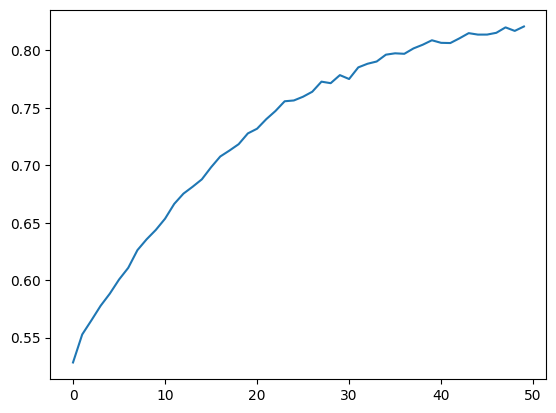

In [ ]:
# Evaluating the model on accuracy
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'])

### **Generating Stories**

In [ ]:
# Defining a function to take input of seed text from user and no. of words to be predicted
import matplotlib.pyplot as plt

def generate_text(seed, no_words):
    generated_text = seed
    for i in range(no_words):
        token_list = tokenizer.texts_to_sequences([generated_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_length - 1, padding='pre')
        predicted = np.argmax(model.predict(token_list), axis=1)

        new_word = ''
        for word, index in tokenizer.word_index.items():
            if predicted == index:
                new_word = word
                break
        generated_text += " " + new_word
    return generated_text

In [ ]:
seed_text = 'it was a'


generated_text = generate_text(seed_text, 20)

1/1 [==============================] - 0s 27ms/step


In [ ]:
print(generated_text)

it was a blow to him and it would take him some time before he could see it at the arrival of no


### **Evaluating BLEU score for a single generated text**

In [ ]:
#stories is our cleaned text variable
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu

generated_tokens = generated_text.split()
reference_tokens = [sentence.split() for sentence in final_data]

# Compute the BLEU score
bleu_score = corpus_bleu([reference_tokens], [generated_tokens])

print("BLEU Score:", bleu_score)

BLEU Score: 0.8418503548648442


### **Evaluating BLEU score for a multiple generated texts**

In [ ]:
# List of initial seeds
seeds = ['it was a', 'the case', 'it is not', 'the darkness ']

# Define the number of words to be predicted for each seed
words_to_predict = 30

# Placeholder for BLEU scores and generated texts
bleu_scores = []
generated_texts = []

In [ ]:
# Generate text for each seed and calculate BLEU score
for seed_text in seeds:
    generated_text = generate_text(seed_text, words_to_predict)

    # Compute BLEU score
    generated_tokens = generated_text.split()
    reference_tokens = [sentence.split() for sentence in final_data]
    bleu_score = corpus_bleu([reference_tokens], [generated_tokens])
    bleu_scores.append(bleu_score)
    generated_texts.append(generated_text)
    print(f"Seed Text: '{seed_text}' - BLEU Score: {bleu_score}")

1/1 [==============================] - 0s 28ms/step
Seed Text: 'it was a' - BLEU Score: 0.6658566397918927
1/1 [==============================] - 0s 20ms/step
Seed Text: 'the case' - BLEU Score: 0.5124576721246791
1/1 [==============================] - 0s 23ms/step
Seed Text: 'it is not' - BLEU Score: 0.6640331905260635
1/1 [==============================] - 0s 20ms/step
Seed Text: 'the darkness ' - BLEU Score: 0.5852494669076863


In [ ]:
print(bleu_scores)

[0.6658566397918927, 0.5124576721246791, 0.6640331905260635, 0.5852494669076863]


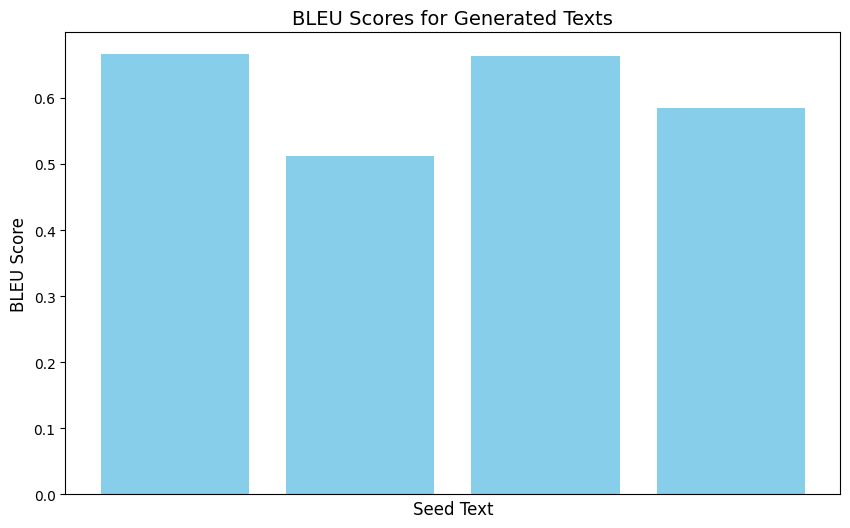

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(seeds, bleu_scores, color='skyblue')  # Plotting the bar chart with seeds as x-axis labels
plt.xlabel('Seed Text', fontsize=12)
plt.ylabel('BLEU Score', fontsize=12)
plt.title('BLEU Scores for Generated Texts', fontsize=14)
plt.xticks([])  # Removing numerical markings on the x-axis
plt.show()


##**Model 2: Multiple text files**

In [ ]:
from google.colab import drive
import tensorflow as tf
import pandas as pd
import numpy as np
import os

story_path = "/content/drive/My Drive/sherlock_5"

def read_all_stories(story_path):
    sentences = []  # To store complete sentences

    for root, _, files in os.walk(story_path):
        for file in files:
            # Check if the file has a ".txt" extension
            if file.endswith('.txt'):
                with open(os.path.join(root, file), 'r') as f:
                    current_sentence = []  # To store words of the current sentence

                    for line in f:
                        line = line.strip()

                        if line == '----------':
                            if current_sentence:
                                # Join words to form a complete sentence
                                sentences.append(' '.join(current_sentence))
                                current_sentence = []  # Reset for the next sentence
                        elif line != '':
                            current_sentence.append(line)

                    # Check if there is an unfinished sentence
                    if current_sentence:
                        sentences.append(' '.join(current_sentence))

    # Join all sentences into a single string separated by newline characters
    txt = '\n'.join(sentences)

    return txt


story_data = read_all_stories(story_path)

print(story_data[:2])

TH


In [ ]:
# data cleaning process
import re
# Regular expressions to use sub function for replacing the useless text from the data

def clean_text(text):
  text = re.sub(r',', '', text)
  text = re.sub(r'\'', '',  text)
  text = re.sub(r'\"', '', text)
  text = re.sub(r'\(', '', text)
  text = re.sub(r'\)', '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub(r'“', '', text)
  text = re.sub(r'”', '', text)
  text = re.sub(r'’', '', text)
  text = re.sub(r'\.', '', text)
  text = re.sub(r';', '', text)
  text = re.sub(r':', '', text)
  text = re.sub(r'\-', '', text)

  return text

# cleaning the data
lower_data = story_data.lower()
# Converting the string to lower case to get uniformity

split_data = lower_data.splitlines()
# Splitting the data to get every line seperately but this will give the list of uncleaned data

#print(split_data)

final = ''
# initiating a argument with blank string to hold the values of final cleaned data

for line in split_data:
  line = clean_text(line)
  final += '\n' + line

#print(final)

final_data = final.split('\n')
# splitting again to get list of cleaned and splitted data ready to be processed
#print(final_data)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Instantiating the Tokenizer
max_vocab = 1000000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(final_data)

# Getting the total number of words of the data.
word2idx = tokenizer.word_index
print(len(word2idx))
print(word2idx)
vocab_size = len(word2idx) + 1 # Adding 1 to the vocab_size because the index starts from 1 not 0. This will make it uniform when using it further
print(vocab_size)

# We will turn the sentences to sequences line by line and create n_gram sequences

input_seq = []

for line in final_data:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_seq = token_list[:i+1]
    input_seq.append(n_gram_seq)

print(input_seq)

# Getting the maximum length of sequence for padding purpose
max_seq_length = max(len(x) for x in input_seq)
#print(max_seq_length)

# Padding the sequences and converting them to array
input_seq = np.array(pad_sequences(input_seq, maxlen=max_seq_length, padding='pre'))
print(input_seq)

# Taking xs and labels to train the model.

xs = input_seq[:, :-1]        # xs contains every word in sentence except the last one because we are using this value to predict the y value
labels = input_seq[:, -1]     # labels contains only the last word of the sentence which will help in hot encoding the y value in next step
#print("xs: ",xs)
#print("labels:",labels)

3710
{'the': 1, 'of': 2, 'and': 3, 'a': 4, 'i': 5, 'to': 6, 'in': 7, 'that': 8, 'was': 9, 'it': 10, 'had': 11, 'he': 12, 'you': 13, 'is': 14, 'his': 15, 'with': 16, 'she': 17, 'my': 18, 'have': 19, 'at': 20, 'this': 21, 'which': 22, 'for': 23, 'as': 24, 'her': 25, 'but': 26, 'we': 27, 'me': 28, 'from': 29, 'not': 30, 'no': 31, 'holmes': 32, 'be': 33, 'there': 34, 'been': 35, 'on': 36, 'said': 37, 'an': 38, 'what': 39, 'one': 40, 'all': 41, 'by': 42, 'were': 43, 'so': 44, 'upon': 45, 'him': 46, 'could': 47, 'are': 48, 'would': 49, 'some': 50, 'when': 51, 'man': 52, 'your': 53, 'has': 54, 'will': 55, 'very': 56, 'old': 57, 'who': 58, 'well': 59, 'then': 60, 'if': 61, 'they': 62, 'or': 63, 'out': 64, 'up': 65, 'our': 66, 'down': 67, 'them': 68, 'can': 69, 'into': 70, 'now': 71, 'lady': 72, 'see': 73, 'house': 74, 'only': 75, 'us': 76, 'mr': 77, 'should': 78, 'watson': 79, 'room': 80, 'where': 81, 'more': 82, 'left': 83, 'come': 84, 'must': 85, 'any': 86, 'here': 87, 'last': 88, 'do': 89, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[   0    0    0 ...    0    1  820]
 [   0    0    0 ...    1  820    2]
 [   0    0    0 ...  820    2   72]
 ...
 [   0    0    0 ...   29    1 1005]
 [   0    0    0 ...    1 1005 1006]
 [   0    0    0 ... 1005 1006 1007]]


In [ ]:
from keras.utils import to_categorical

# one-hot encoding the labels according to the vocab size

# The matrix is square matrix of the size of vocab_size. Each row will denote a label and it will have
# a single +ve value(i.e 1) for that label and other values will be zero.

ys = to_categorical(labels, num_classes=vocab_size)
print(ys)

from keras.layers import Input, Dense, Embedding, LSTM, Dropout, Bidirectional, GlobalMaxPooling1D
from keras.models import Model
from keras.optimizers import Adam
from keras.models import Sequential

# using the functional APIs of keras to define the model

i = Input(shape=(max_seq_length - 1, )) # using 1 less value becasuse we are preserving the last value for predicted word
x = Embedding(vocab_size, 124)(i)
x = Dropout(0.2)(x)
x = LSTM(520, return_sequences=True)(x)
x = Bidirectional(layer=LSTM(340, return_sequences=True))(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(vocab_size, activation='softmax')(x)

model = Model(i,x)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
from keras.optimizers import Adam  # Import the Adam optimizer

model.compile(optimizer=Adam(learning_rate=0.01),  # Instantiate Adam optimizer with the desired learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(xs, ys, epochs=50)


In [ ]:
model.summary()

### **Plotting the accuracy**

In [ ]:
# Evaluating the model on accuracy
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'])

### **Generating Stories**

In [ ]:
# Defining a function to take input of seed text from user and no. of words to be predicted

def generate_text(seed, no_words):
  for i in range(no_words):
    token_list = tokenizer.texts_to_sequences([seed])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_length-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=1)

    new_word = ''

    for word, index in tokenizer.word_index.items():
      if predicted == index:
        new_word = word
        break
    seed += " " + new_word
  return (seed)

# predicting or generating the poem with the seed text

seed_text = 'as the night'


generated_text = generate_text(seed_text,50)



### **Evaluating BLEU score for single generated text**

In [ ]:
print(generated_text)

In [ ]:
#stories is our cleaned text variable
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu

generated_tokens = generated_text.split()
reference_tokens = [sentence.split() for sentence in final_data]

# Compute the BLEU score
bleu_score = corpus_bleu([reference_tokens], [generated_tokens])

print("BLEU Score:", bleu_score)

In [ ]:
seed_text = 'the game'


generated_text = generated_text(seed_text,50)

1/1 [==============================] - 0s 112ms/step


In [ ]:
print(generated_text)

'Sherlock Holmes sat silent for some few minutes with his brows i met on the heapedup edges of your permission which was'

In [ ]:
#stories is our cleaned text variable
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu

generated_tokens = generated_text.split()
reference_tokens = [sentence.split() for sentence in final_data]

# Compute the BLEU score
bleu_score = corpus_bleu([reference_tokens], [generated_tokens])

print("BLEU Score:", bleu_score)

BLEU Score: 0.6179503723846694


In [ ]:
seed_text = 'there was'
next_words = 20

generated_text = generate_text(seed_text, next_words)

1/1 [==============================] - 0s 104ms/step


In [ ]:
generated_text

'there was a double line of tracks of a booted man and a second one and a long mirror holmes went the'

In [ ]:
#stories is our cleaned text variable
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu

generated_tokens = generated_text.split()
reference_tokens = [sentence.split() for sentence in final_data]

# Compute the BLEU score
bleu_score = corpus_bleu([reference_tokens], [generated_tokens])

print("BLEU Score:", bleu_score)

BLEU Score: 0.8215285590919671


### **Evaluating BLEU score for Multiple generated text(s)**

In [ ]:
# List of initial seeds
seeds = ['a case of', 'first rule of', 'a sharp scream', 'a wild place']

# Define the number of words to be predicted for each seed
words_to_predict = 30

# Placeholder for BLEU scores and generated texts
bleu_scores_2 = []
generated_texts_2 = []

In [ ]:
# Generate text for each seed and calculate BLEU score
for seed_text in seeds:
    generated_text = generate_text(seed_text, words_to_predict)

    # Compute BLEU score
    generated_tokens = generated_text.split()
    reference_tokens = [sentence.split() for sentence in final_data]
    bleu_score = corpus_bleu([reference_tokens], [generated_tokens])
    bleu_scores.append(bleu_score)
    generated_texts_2.append(generated_text)
    print(f"Seed Text: '{seed_text}' - BLEU Score: {bleu_score}")

In [ ]:
print(bleu_scores_2)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(len(seeds)), bleu_scores_2, color='skyblue')
plt.xlabel('Seed Text', fontsize=12)
plt.ylabel('BLEU Score', fontsize=12)
plt.title('BLEU Scores for Generated Texts', fontsize=14)
plt.xticks(range(len(seeds)), seeds, rotation=45, ha='right')
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.show()


## **Using a Pre-Trained Model to generate stories**

In [ ]:
# Import necessary libraries
from transformers import pipeline, AutoTokenizer, AutoModelForCausalLM
#I have seldom heard him mention her under any other name.
# Step 1: Create a text generation pipeline
generator = pipeline("text-generation", model="gpt2")

# Step 2: Process your tokenized corpus into a single string
cleaned_stories_trial = [
    ["Sherlock", "Holmes", "leaned", "back", "in", "his", "chair", "and", "lit", "his", "pipe"],
    ["The", "murder", "occurred", "in", "Baker", "Street", "under", "the", "watchful", "eye", "of", "Watson"]

]
'''["Irene", "Adler", "was", "the", "notable", "woman", "in", "Sherlock's", "life"],
    ["The", "hound", "of", "the", "Baskervilles", "haunted", "the", "moors"],'''
# Combine the tokenized stories into a single string
input_text = " ".join(" ".join(tokens) for tokens in cleaned_stories_trial)

# Step 3: Use the pipeline to generate a story
generated_story = generator(input_text, max_length=200, num_return_sequences=1, do_sample=True)

# Extract and print the generated story
story_text = generated_story[0]['generated_text']
print(story_text)



Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Sherlock Holmes leaned back in his chair and lit his pipe The murder occurred in Baker Street under the watchful eye of Watson. A huge, bearded man lay in bed on the left side of their rented room in front of Mr Holmes, who would not speak because his face was covered. An old man who was a member of the Royal Armed Forces of England and was a retired surgeon told Mr Holmes that a few years earlier, while living at his friend's house in London, Holmes had died of cancer, and that all the staff and nurses must be kept under cover to keep them alive until they could be given medical care. Holmes nodded with admiration and thanked Mr Holmes. On the other side of the chamber next to Mr Holmes lay a group of doctors, who had just left them before being handed to Mr Holmes in full view of the living room audience. In front of them sat Holmes. There was a huge figure, about ten feet tall, with a long, curly hair. Holmes looked at


In [ ]:
#final_data is our cleaned text variable
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu

generated_tokens = story_text.split()
reference_tokens = [sentence.split() for sentence in final_data]

# Compute the BLEU score
bleu_score = corpus_bleu([reference_tokens], [generated_tokens])

print("BLEU Score using a pre-trained model:", bleu_score)

BLEU Score using a pre-trained model: 0.11212776796272299
